<a href="https://colab.research.google.com/github/RheyMartt/CCMACLRL_EXERCISE_COM222ML/blob/main/exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [10]:
df = pd.read_csv("iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.drop(columns = ["Id"], inplace = True)


KeyError: "['Id'] not found in axis"

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Visualize the dataset

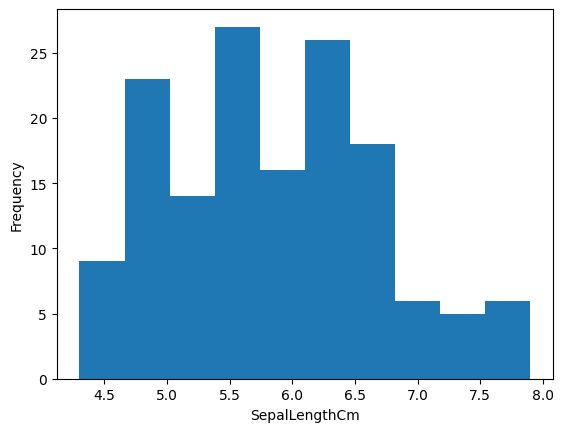

In [17]:
plt.hist(df['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.show()

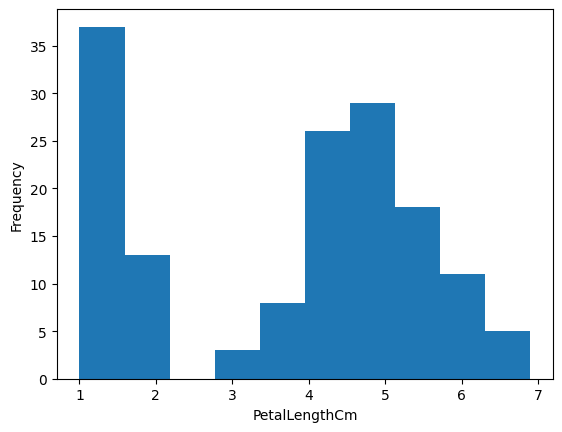

In [19]:
plt.hist(df['PetalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('Frequency')
plt.show()

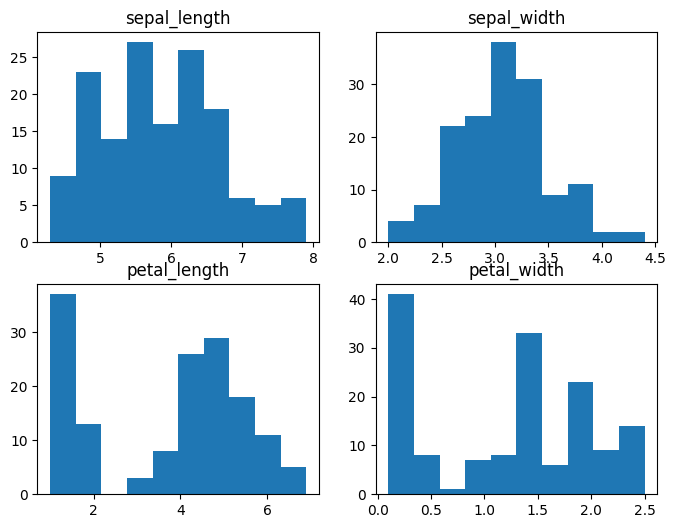

In [21]:
fig, ax = plt.subplots(2,2, figsize = (8,6))

ax[0,0].hist(df['SepalLengthCm'])
ax[0,1].hist(df['SepalWidthCm'])
ax[1,0].hist(df['PetalLengthCm'])
ax[1,1].hist(df['PetalWidthCm'])

ax[0,0].set_title('sepal_length')
ax[0,1].set_title('sepal_width')
ax[1,0].set_title('petal_length')
ax[1,1].set_title('petal_width')

plt.show()

#Scatterplot

In [22]:
colors = {'Iris-setosa':'r',
          'Iris-versicolor':'g',
          'Iris-virginica':'b'}

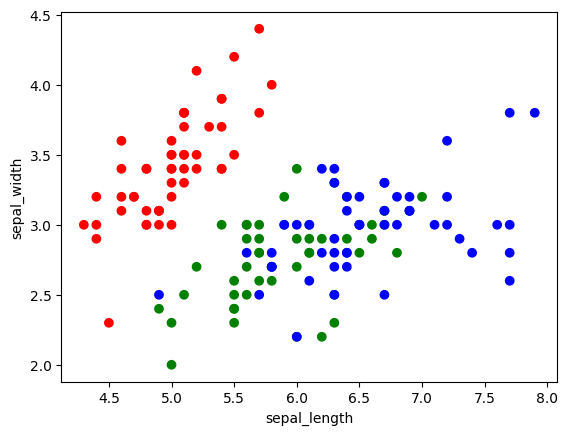

In [23]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], color = df['Species'].map(colors))
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

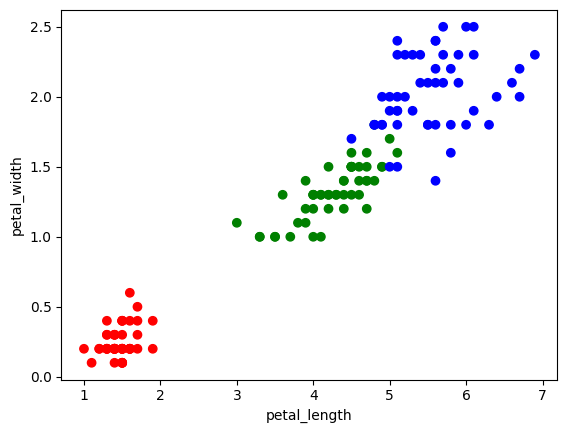

In [24]:
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], color = df['Species'].map(colors))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.show()

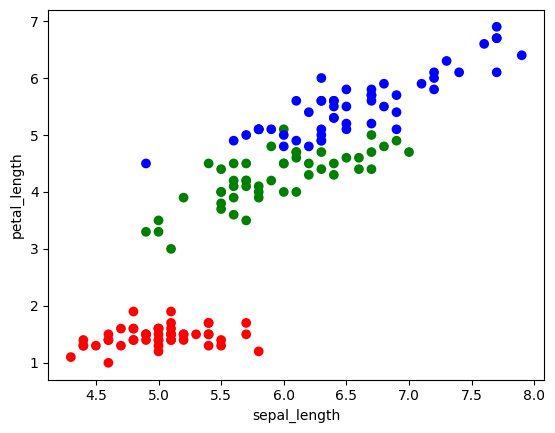

In [26]:
plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'], color = df['Species'].map(colors))
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

4. Split the dataset into a training set and a testing set

In [27]:
X = df.drop(columns = ['Species']).values
y = df['Species'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [31]:
print(X_train)

[[5.1 3.4 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.7 2.6 3.5 1. ]
 [5.4 3.7 1.5 0.2]
 [7.  3.2 4.7 1.4]
 [5.  3.3 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [7.7 3.  6.1 2.3]
 [5.  3.5 1.3 0.3]
 [6.4 3.2 5.3 2.3]
 [5.8 2.7 5.1 1.9]
 [5.6 2.5 3.9 1.1]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [6.5 2.8 4.6 1.5]
 [6.2 2.8 4.8 1.8]
 [5.9 3.  4.2 1.5]
 [6.7 3.3 5.7 2.1]
 [7.7 3.8 6.7 2.2]
 [5.4 3.4 1.7 0.2]
 [6.3 2.5 5.  1.9]
 [5.  3.2 1.2 0.2]
 [4.6 3.4 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [5.2 3.4 1.4 0.2]
 [6.2 2.9 4.3 1.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.7 1. ]
 [5.1 2.5 3.  1.1]
 [5.9 3.  5.1 1.8]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.2 2. ]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 4.9 1.5]
 [4.6 3.6 1.  0.2]
 [6.6 3.  4.4 1.4]
 [4.9 3.1 1.5 0.1]
 [6.7 3.  5.  1.7]
 [6.7 3.  5.2 2.3]
 [5.6 2.9 3.6 1.3]
 [6.3 3.4 5.6 2.4]
 [5.6 2.7 4.2 1.3]
 [6.1 3.  4.9 1.8]
 [6.3 2.3 4.4 1.3]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.4 2.1]
 [6.8 2.8 4.8 1.4]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [5.2 2.7 3.

5. Train the model

In [32]:
knn = KNeighborsClassifier(n_neighbors = 13)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

6. Test the model

In [33]:
knn.predict([[5.1, 3.5, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)

In [34]:
knn.predict([[5.9, 3.0, 5.1, 1.8]])

array(['Iris-virginica'], dtype=object)

In [35]:
knn.predict([[6.7, 3.1, 4.4, 1.4]])

array(['Iris-versicolor'], dtype=object)